In [1]:
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [12,10],dpi =100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.20.3 scipy==1.7.3 pandas==1.3.3 scikit-learn==1.0.2 statsmodels==0.13.0rc0 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [2]:
adata = sc.read_h5ad('SGN_WT.h5ad')

In [3]:
import numpy as np
import pandas as pd

In [4]:
adata.raw = adata
adata.layers['plot'] = np.log1p(adata.X)

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:04)


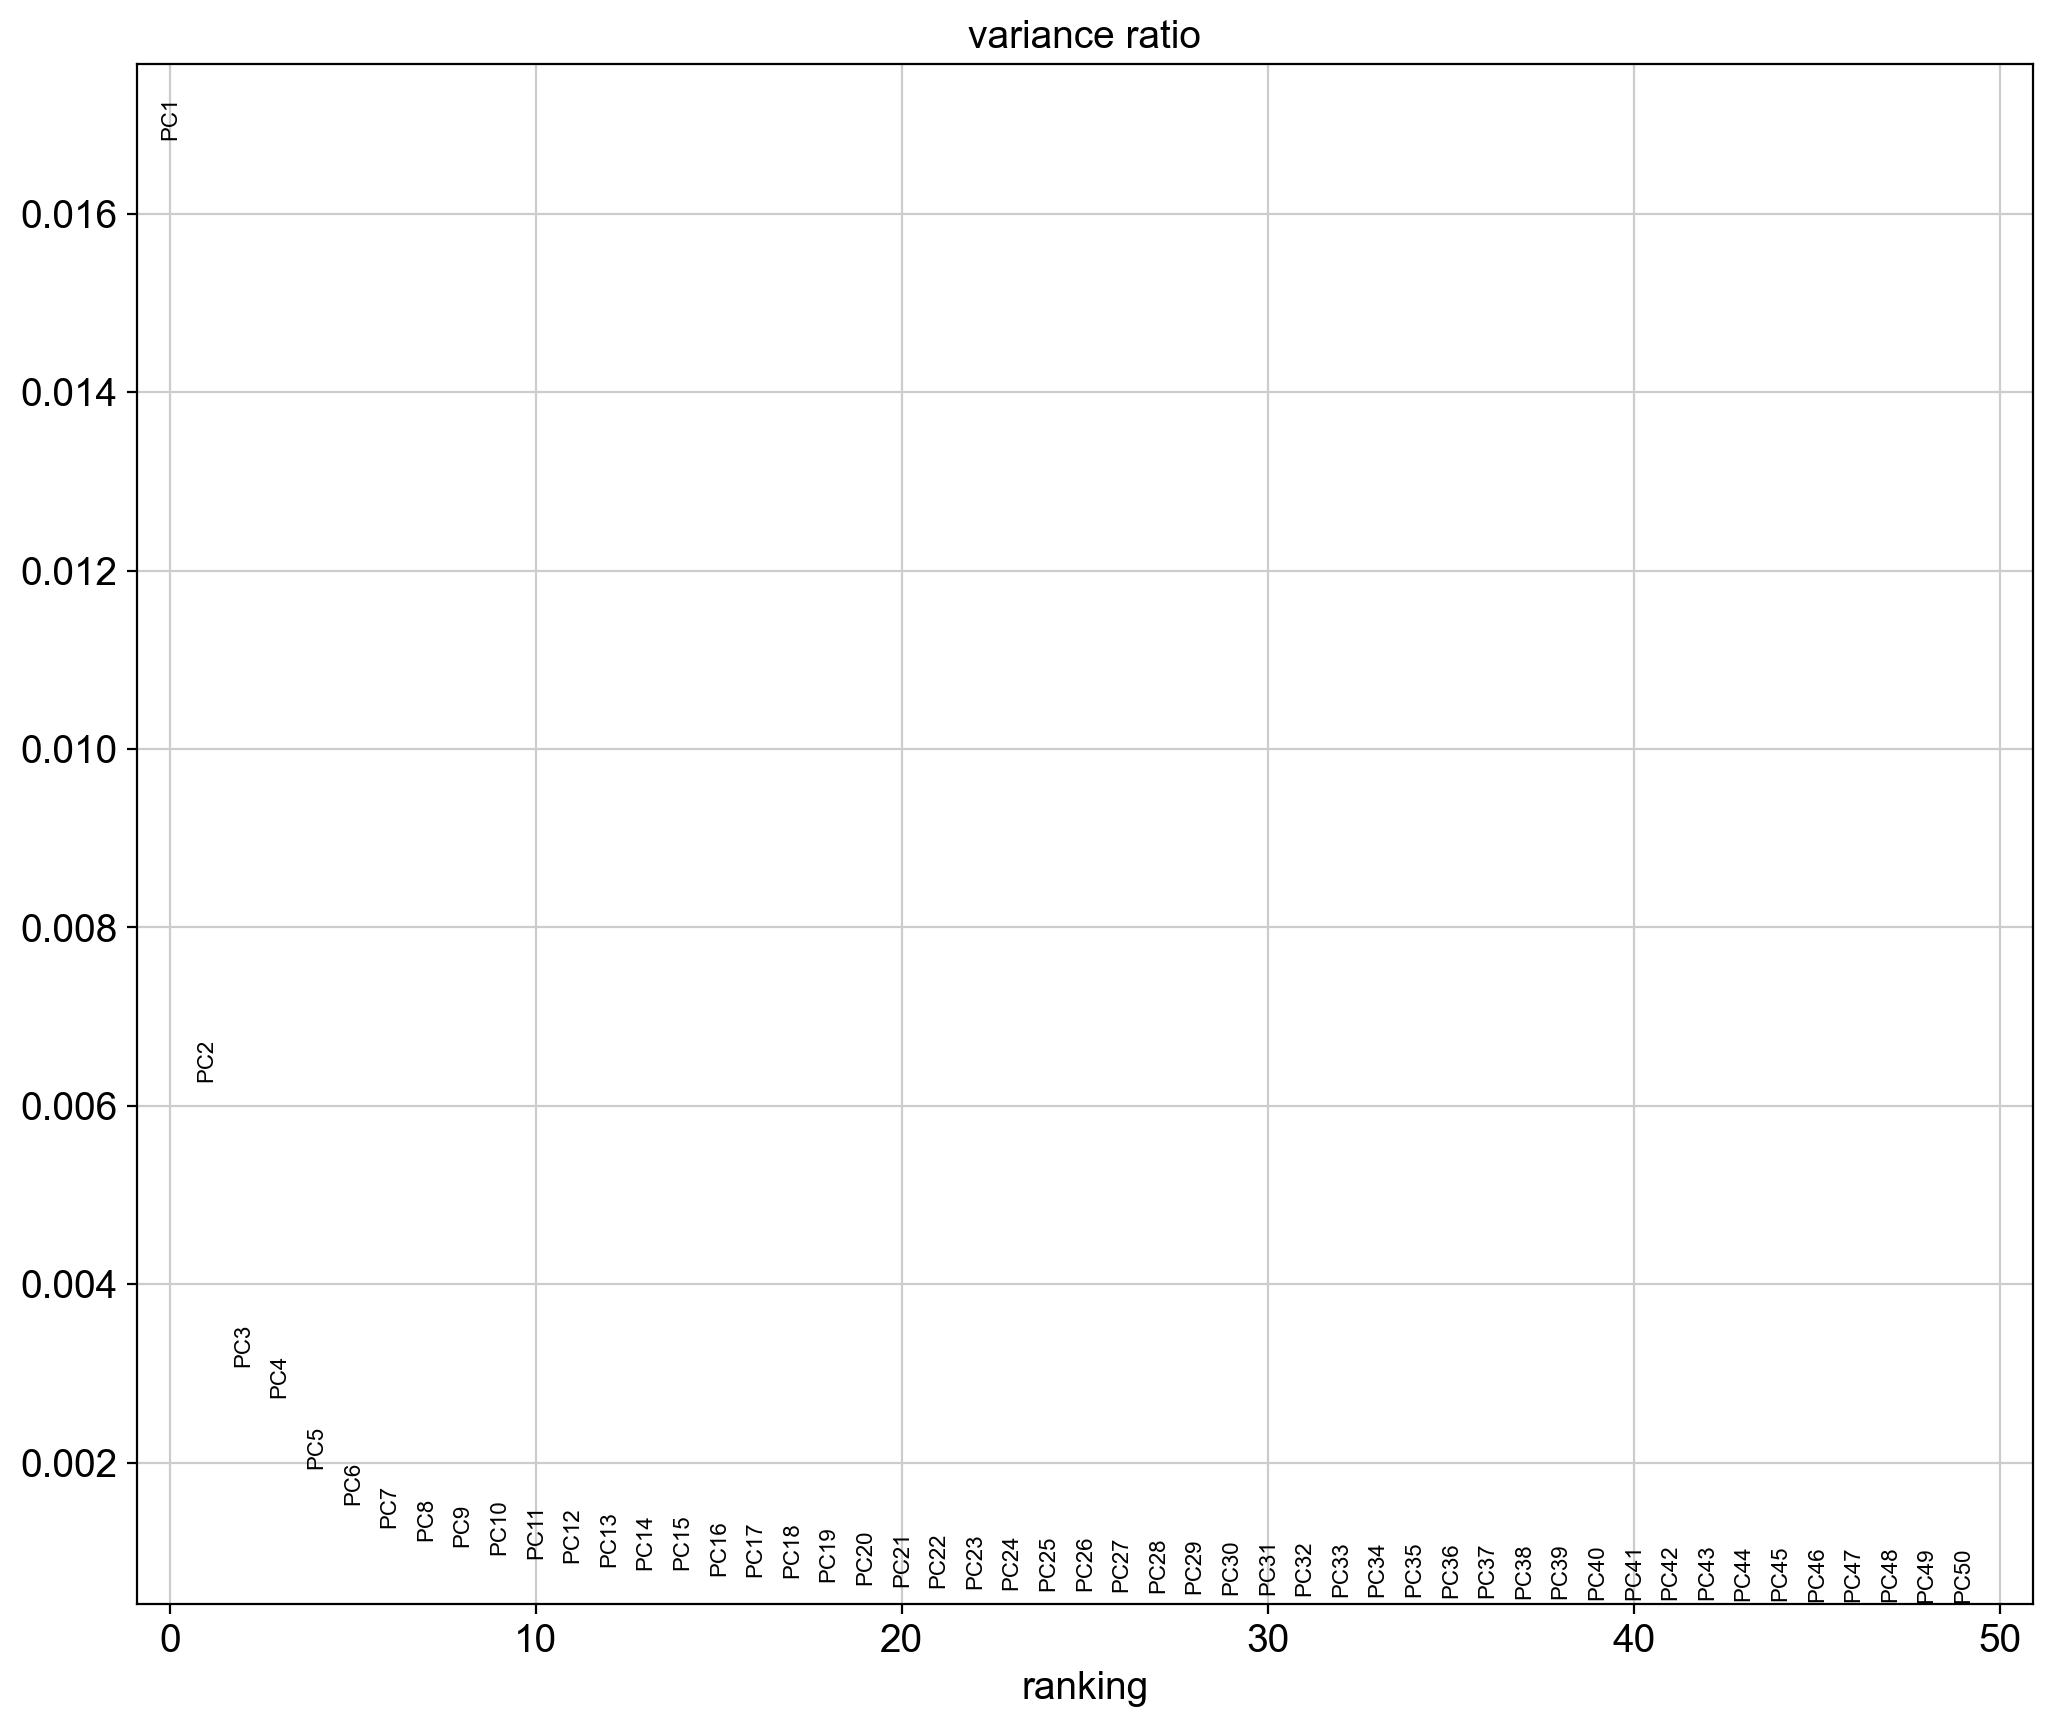

In [6]:
sc.tl.pca(adata,svd_solver = 'auto')
sc.pl.pca_variance_ratio(adata,n_pcs=50)

In [7]:
sc.pp.neighbors(adata,metric = 'sqeuclidean',n_pcs = 15,n_neighbors = 50)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


In [8]:
adata.obs

Cell    NeuronType NeuronSubtype
AAACCTGCACGCCAGT_Mouse1  AAACCTGCACGCCAGT_Mouse1         TypeI       Type IB
AAACCTGCAGGCAGTA_Mouse1  AAACCTGCAGGCAGTA_Mouse1         TypeI       Type IA
AAACCTGGTGGTTTCA_Mouse1  AAACCTGGTGGTTTCA_Mouse1         TypeI       Type IA
AAACGGGGTCATGCAT_Mouse1  AAACGGGGTCATGCAT_Mouse1         TypeI       Type IB
AAACGGGTCCCTAACC_Mouse1  AAACGGGTCCCTAACC_Mouse1         TypeI       Type IB
...                                          ...           ...           ...
TGCTACCAGTGGTCCC_Mouse4  TGCTACCAGTGGTCCC_Mouse4  Putative SGN           NaN
TGTCCCAGTCAAAGCG_Mouse4  TGTCCCAGTCAAAGCG_Mouse4        TypeII           NaN
TGTGGTAAGATTACCC_Mouse4  TGTGGTAAGATTACCC_Mouse4         TypeI       Type IA
TTCCCAGCATCCTTGC_Mouse4  TTCCCAGCATCCTTGC_Mouse4  Putative SGN           NaN
TTCGAAGTCTTAGAGC_Mouse4  TTCGAAGTCTTAGAGC_Mouse4  Putative SGN           NaN

[6713 rows x 3 columns]

In [8]:
sc.tl.umap(adata,min_dist = 0.3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


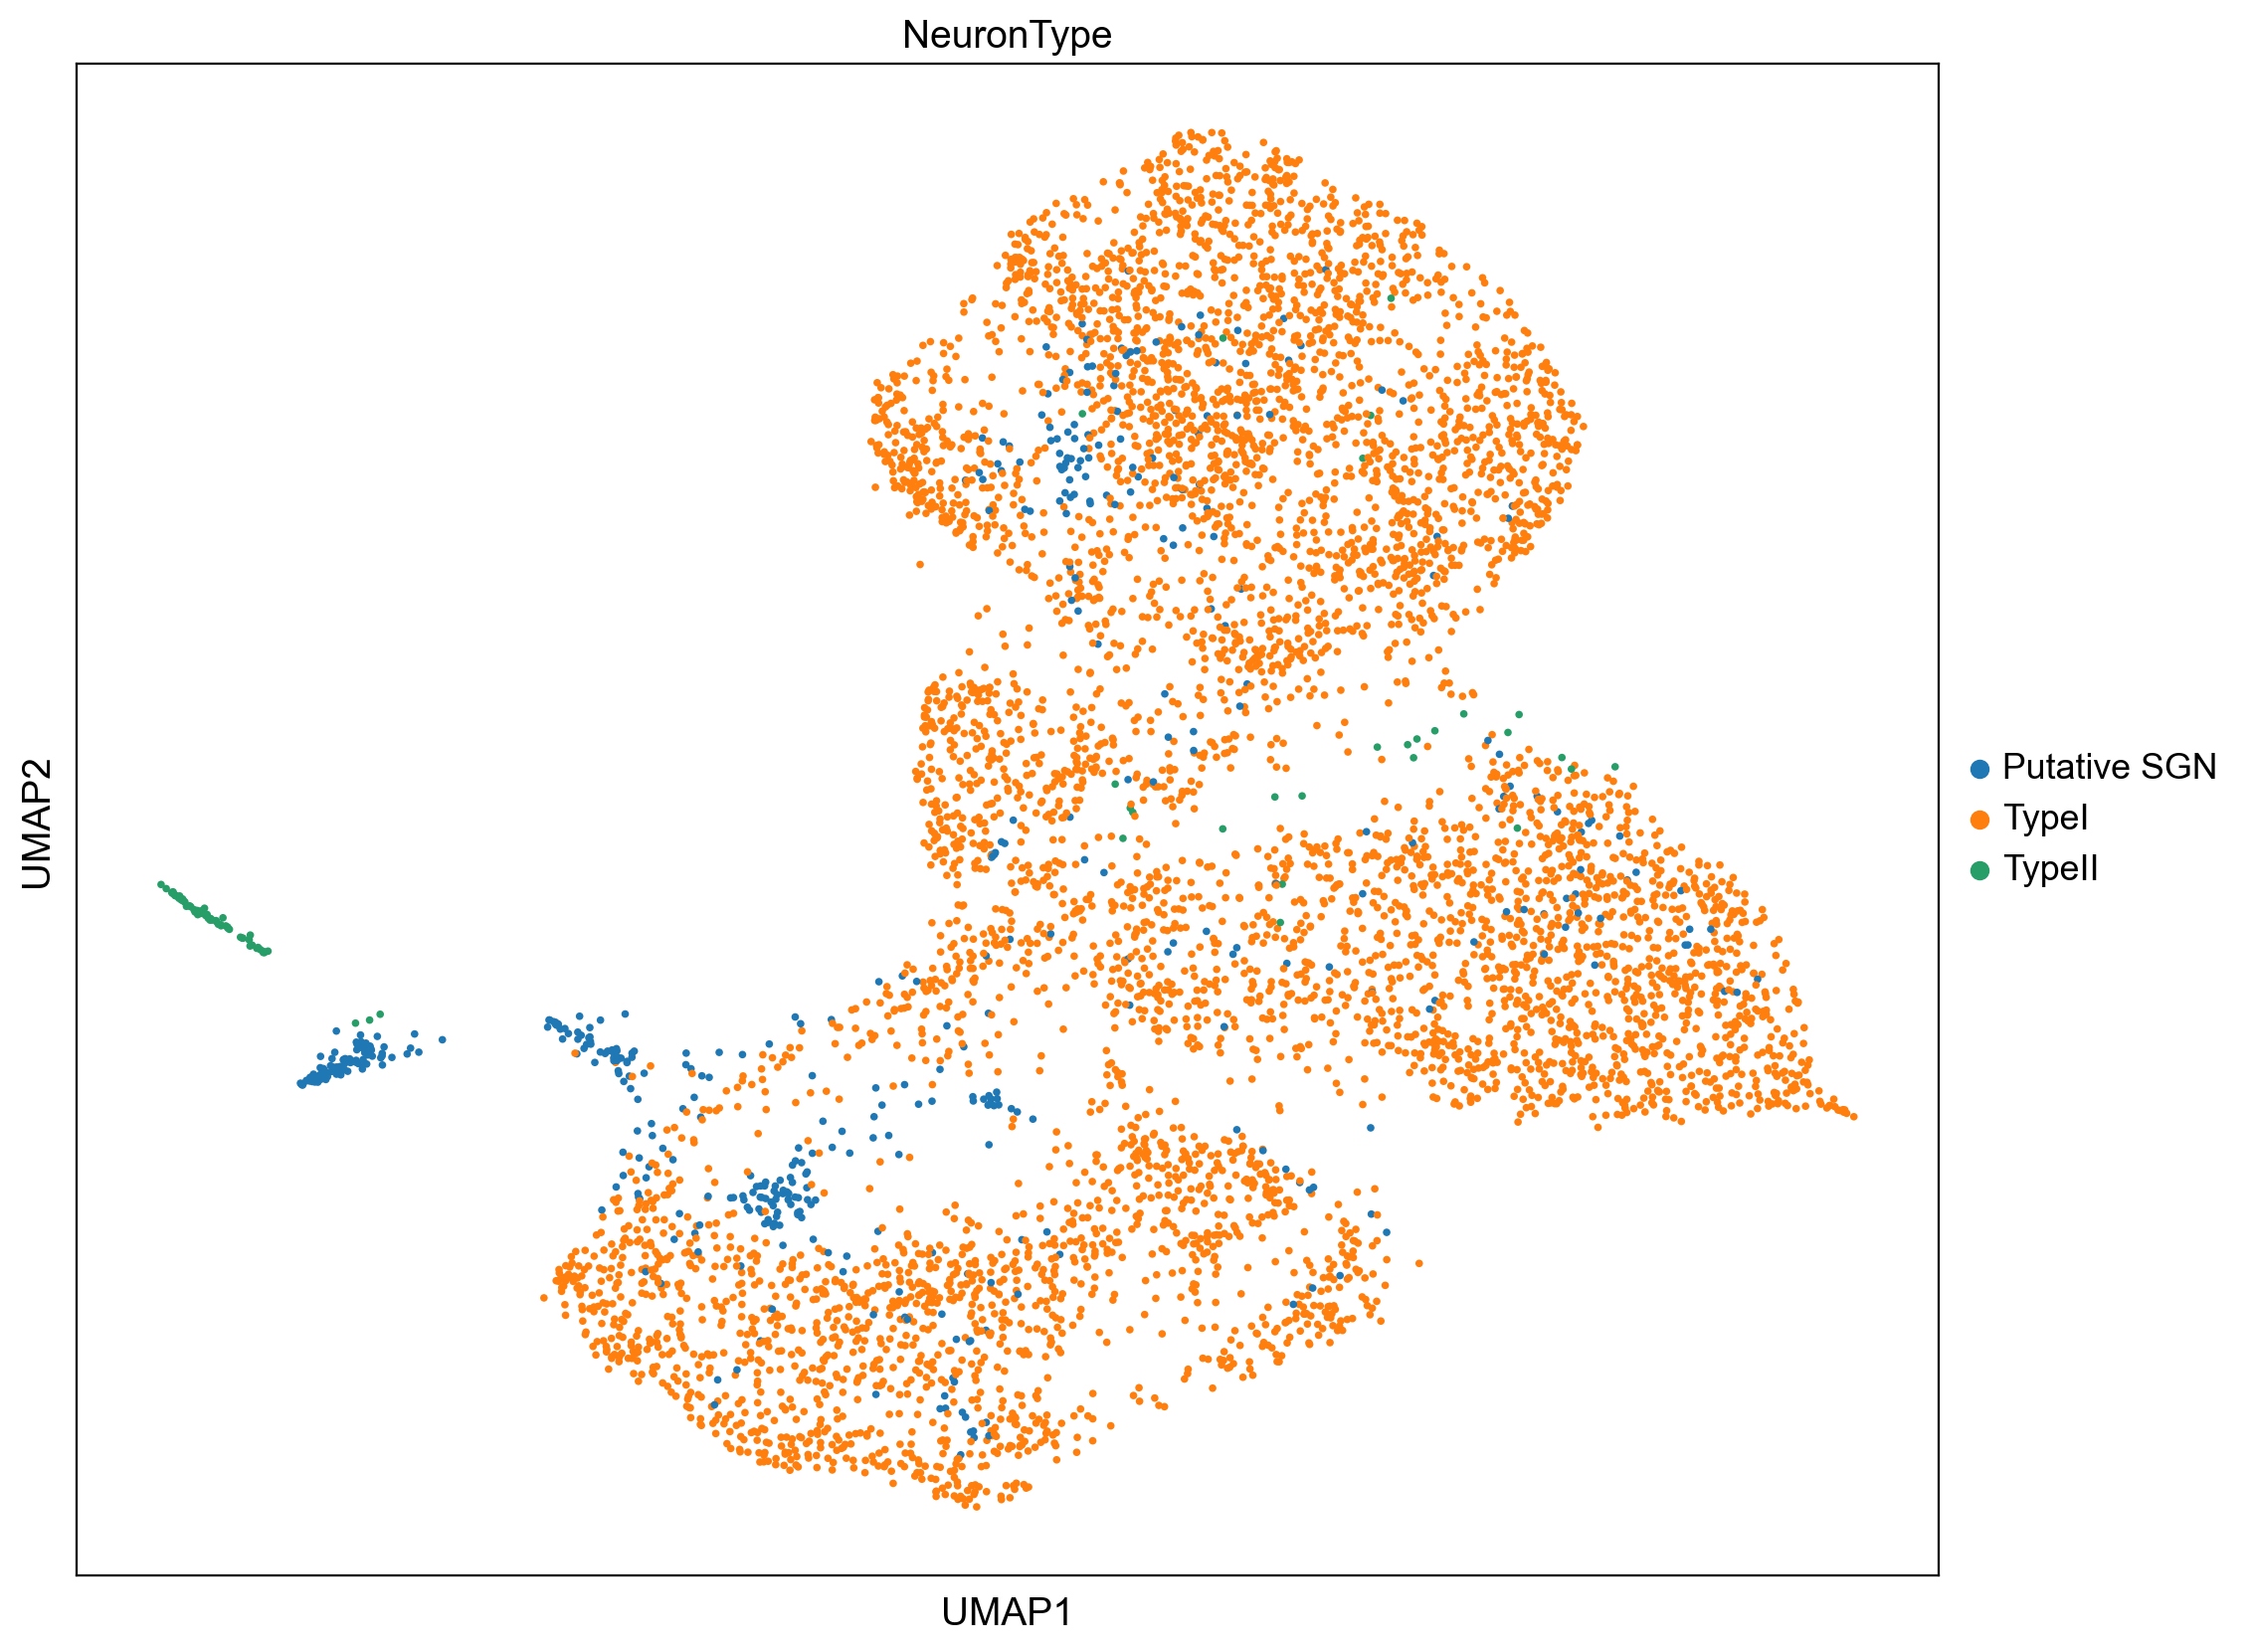

In [9]:
sc.pl.umap(adata,color = 'NeuronType',size = 30)

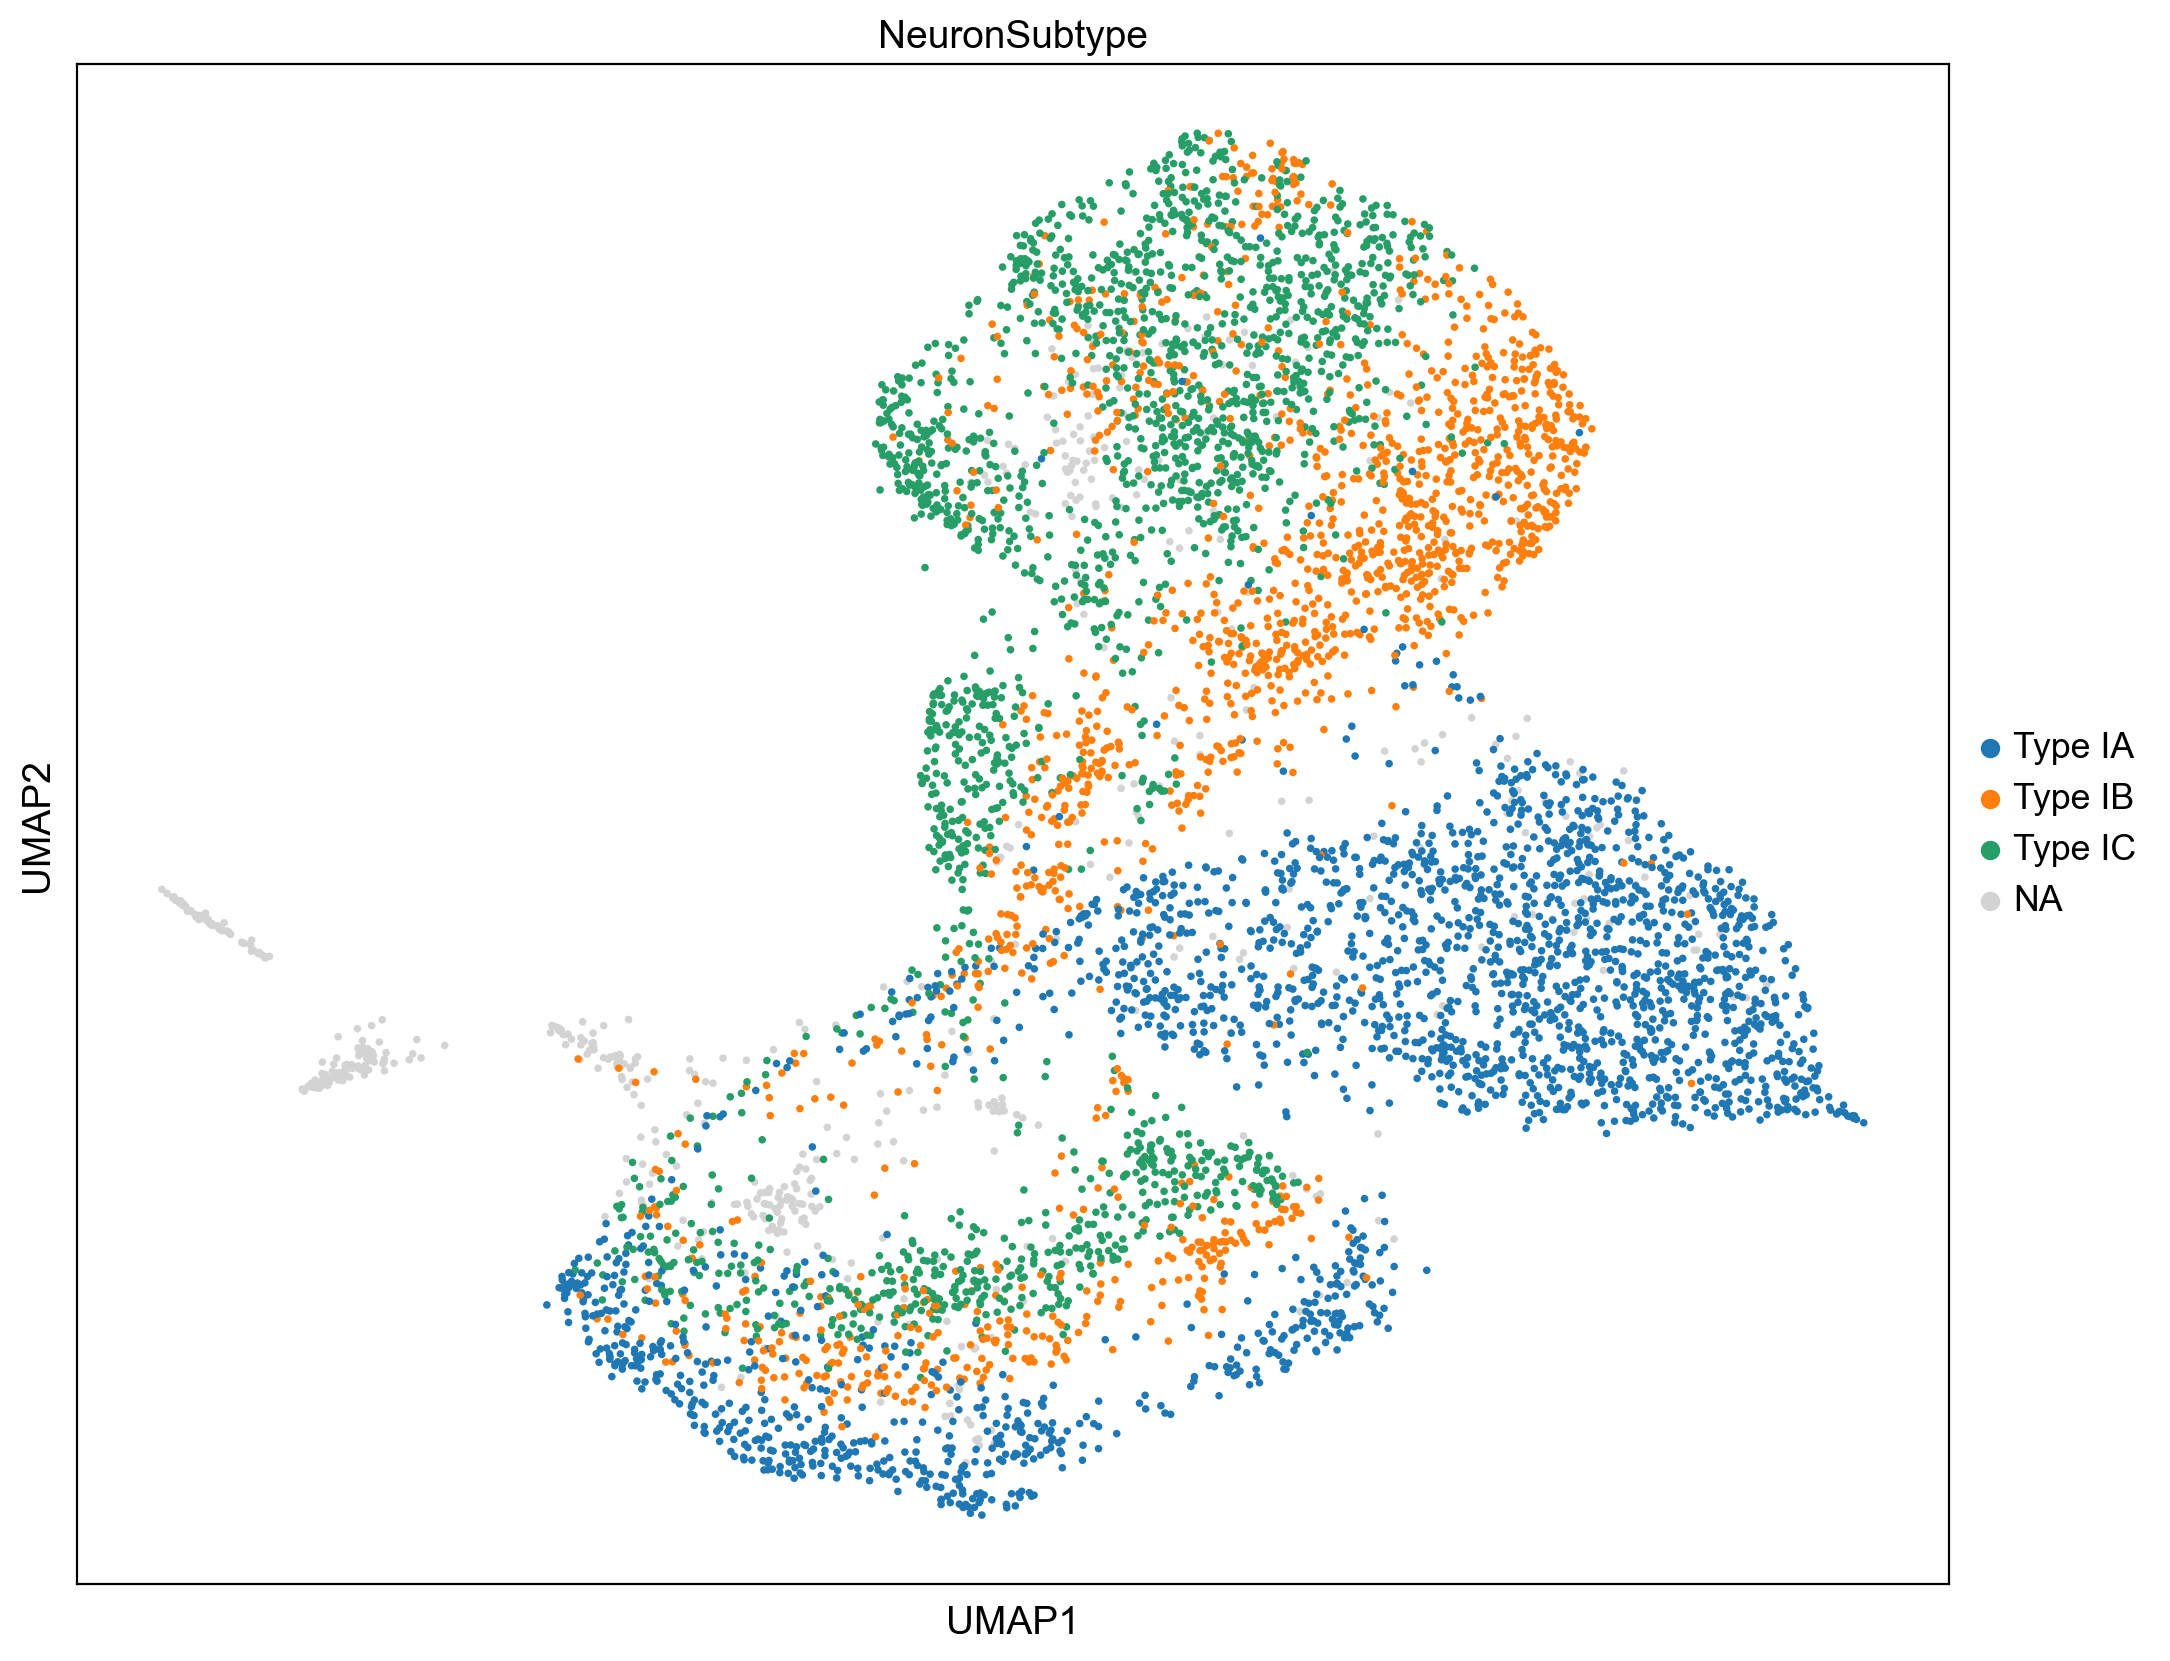

In [12]:
sc.pl.umap(adata,color = 'NeuronSubtype',size = 30)

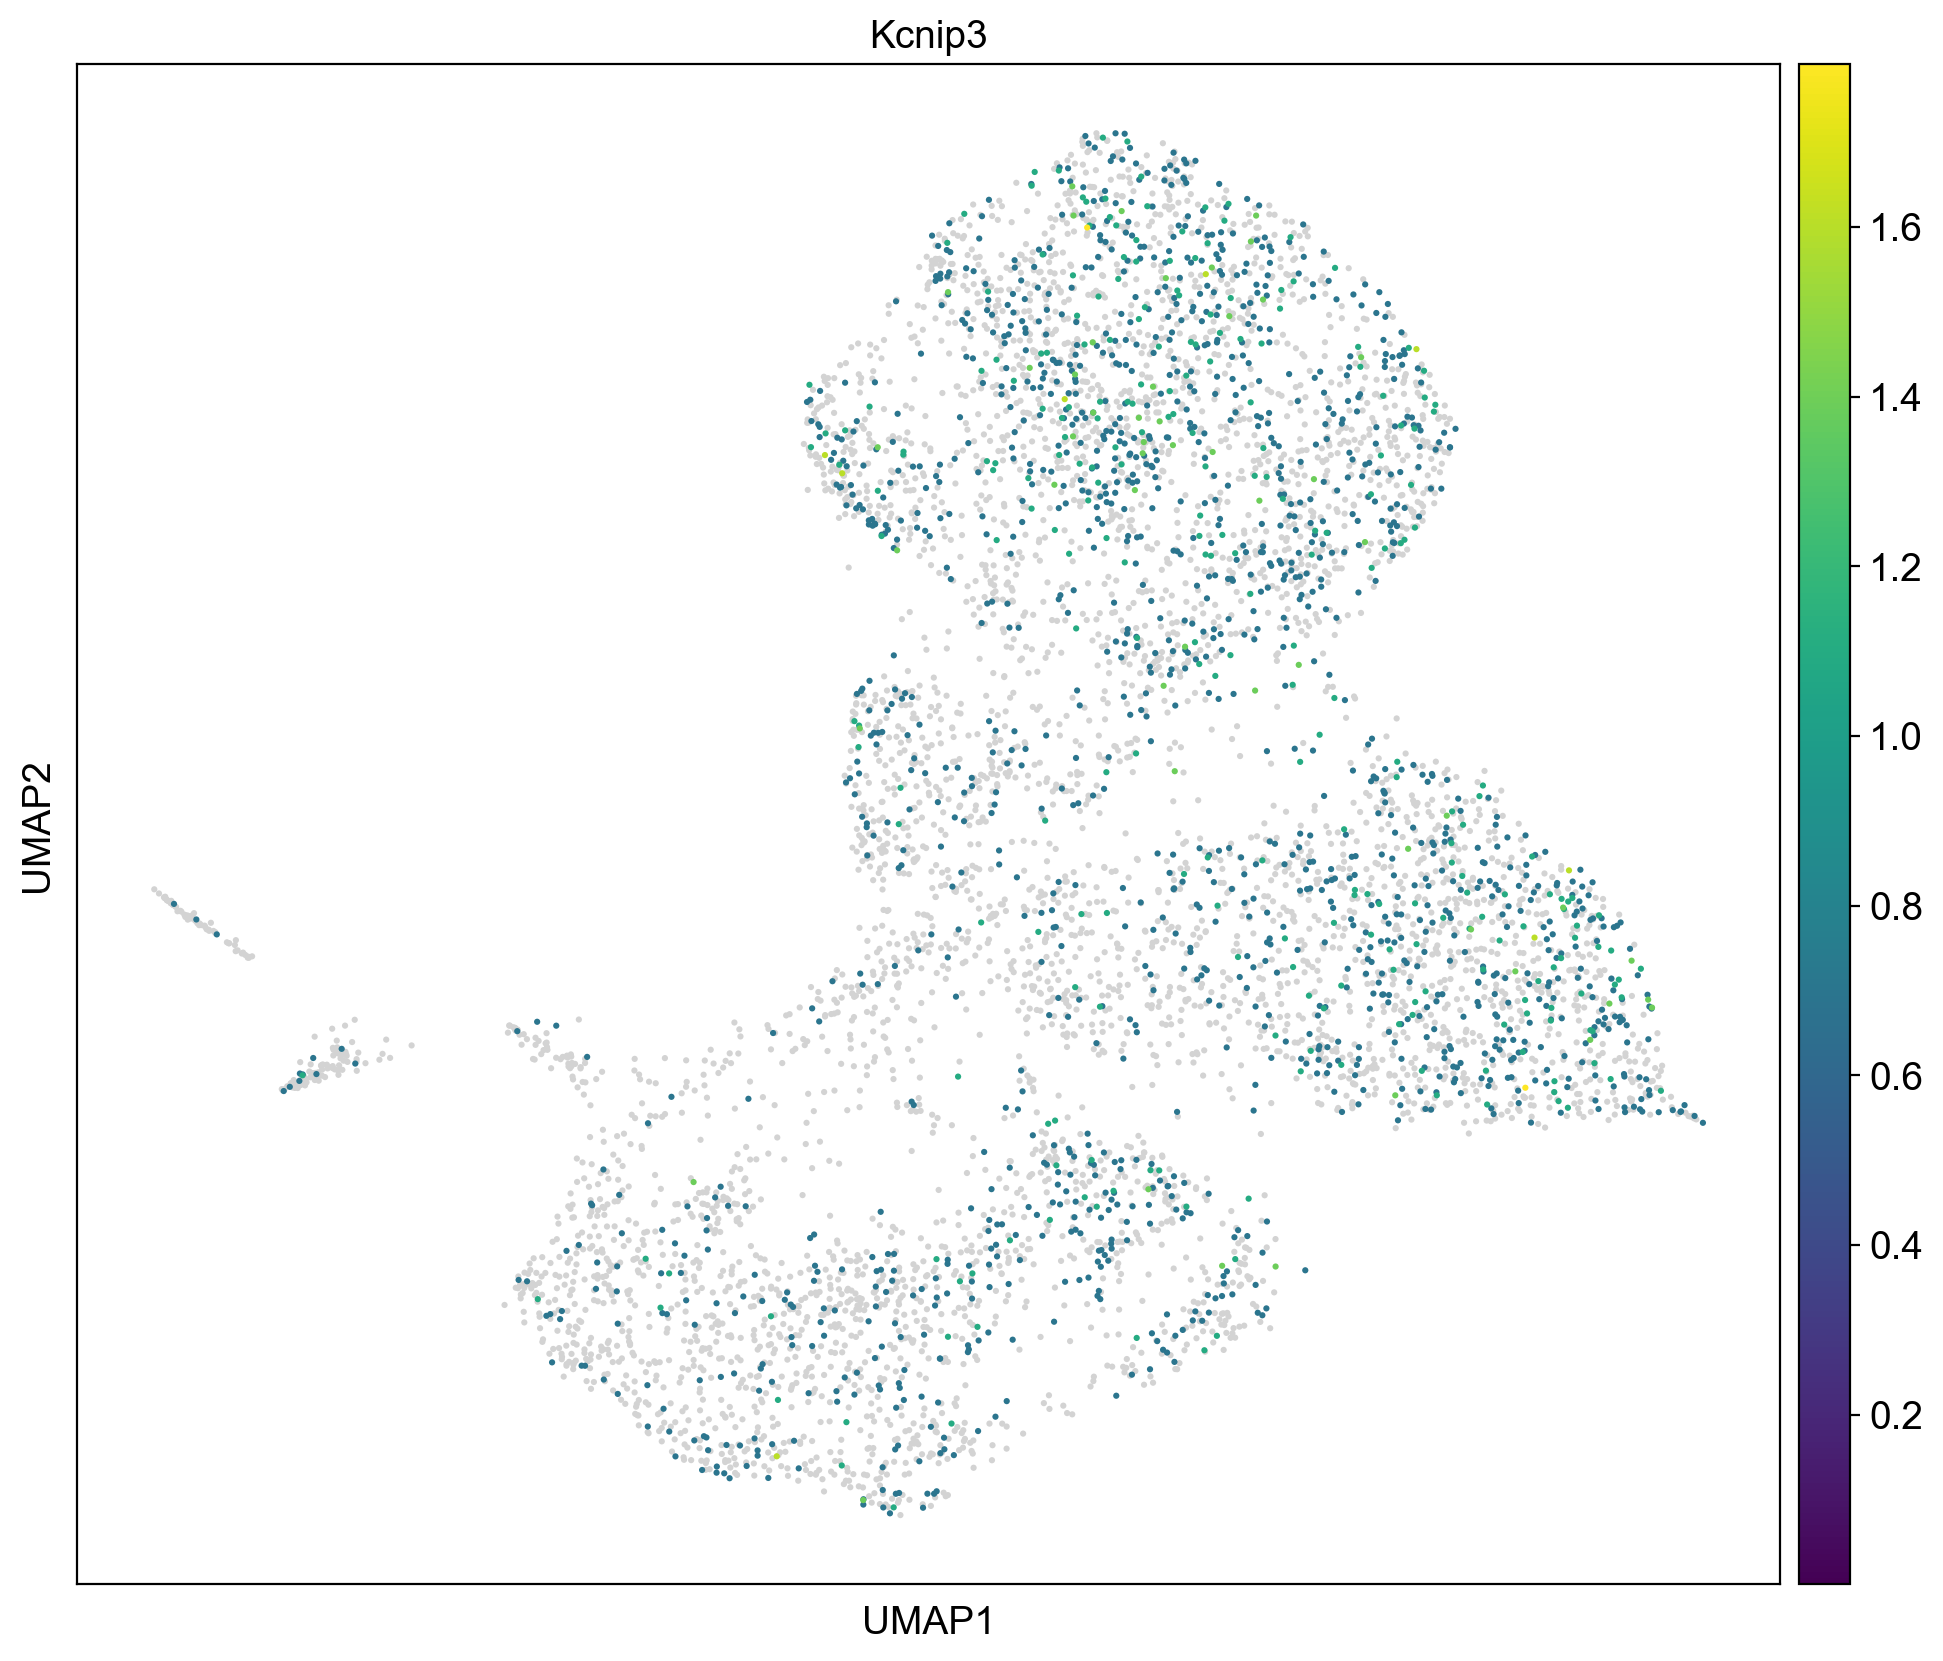

In [10]:
sc.pl.umap(adata, color= 'Kcnip3',
           size = 20,layer = 'plot',color_map = vir,vmin = 0.000001)

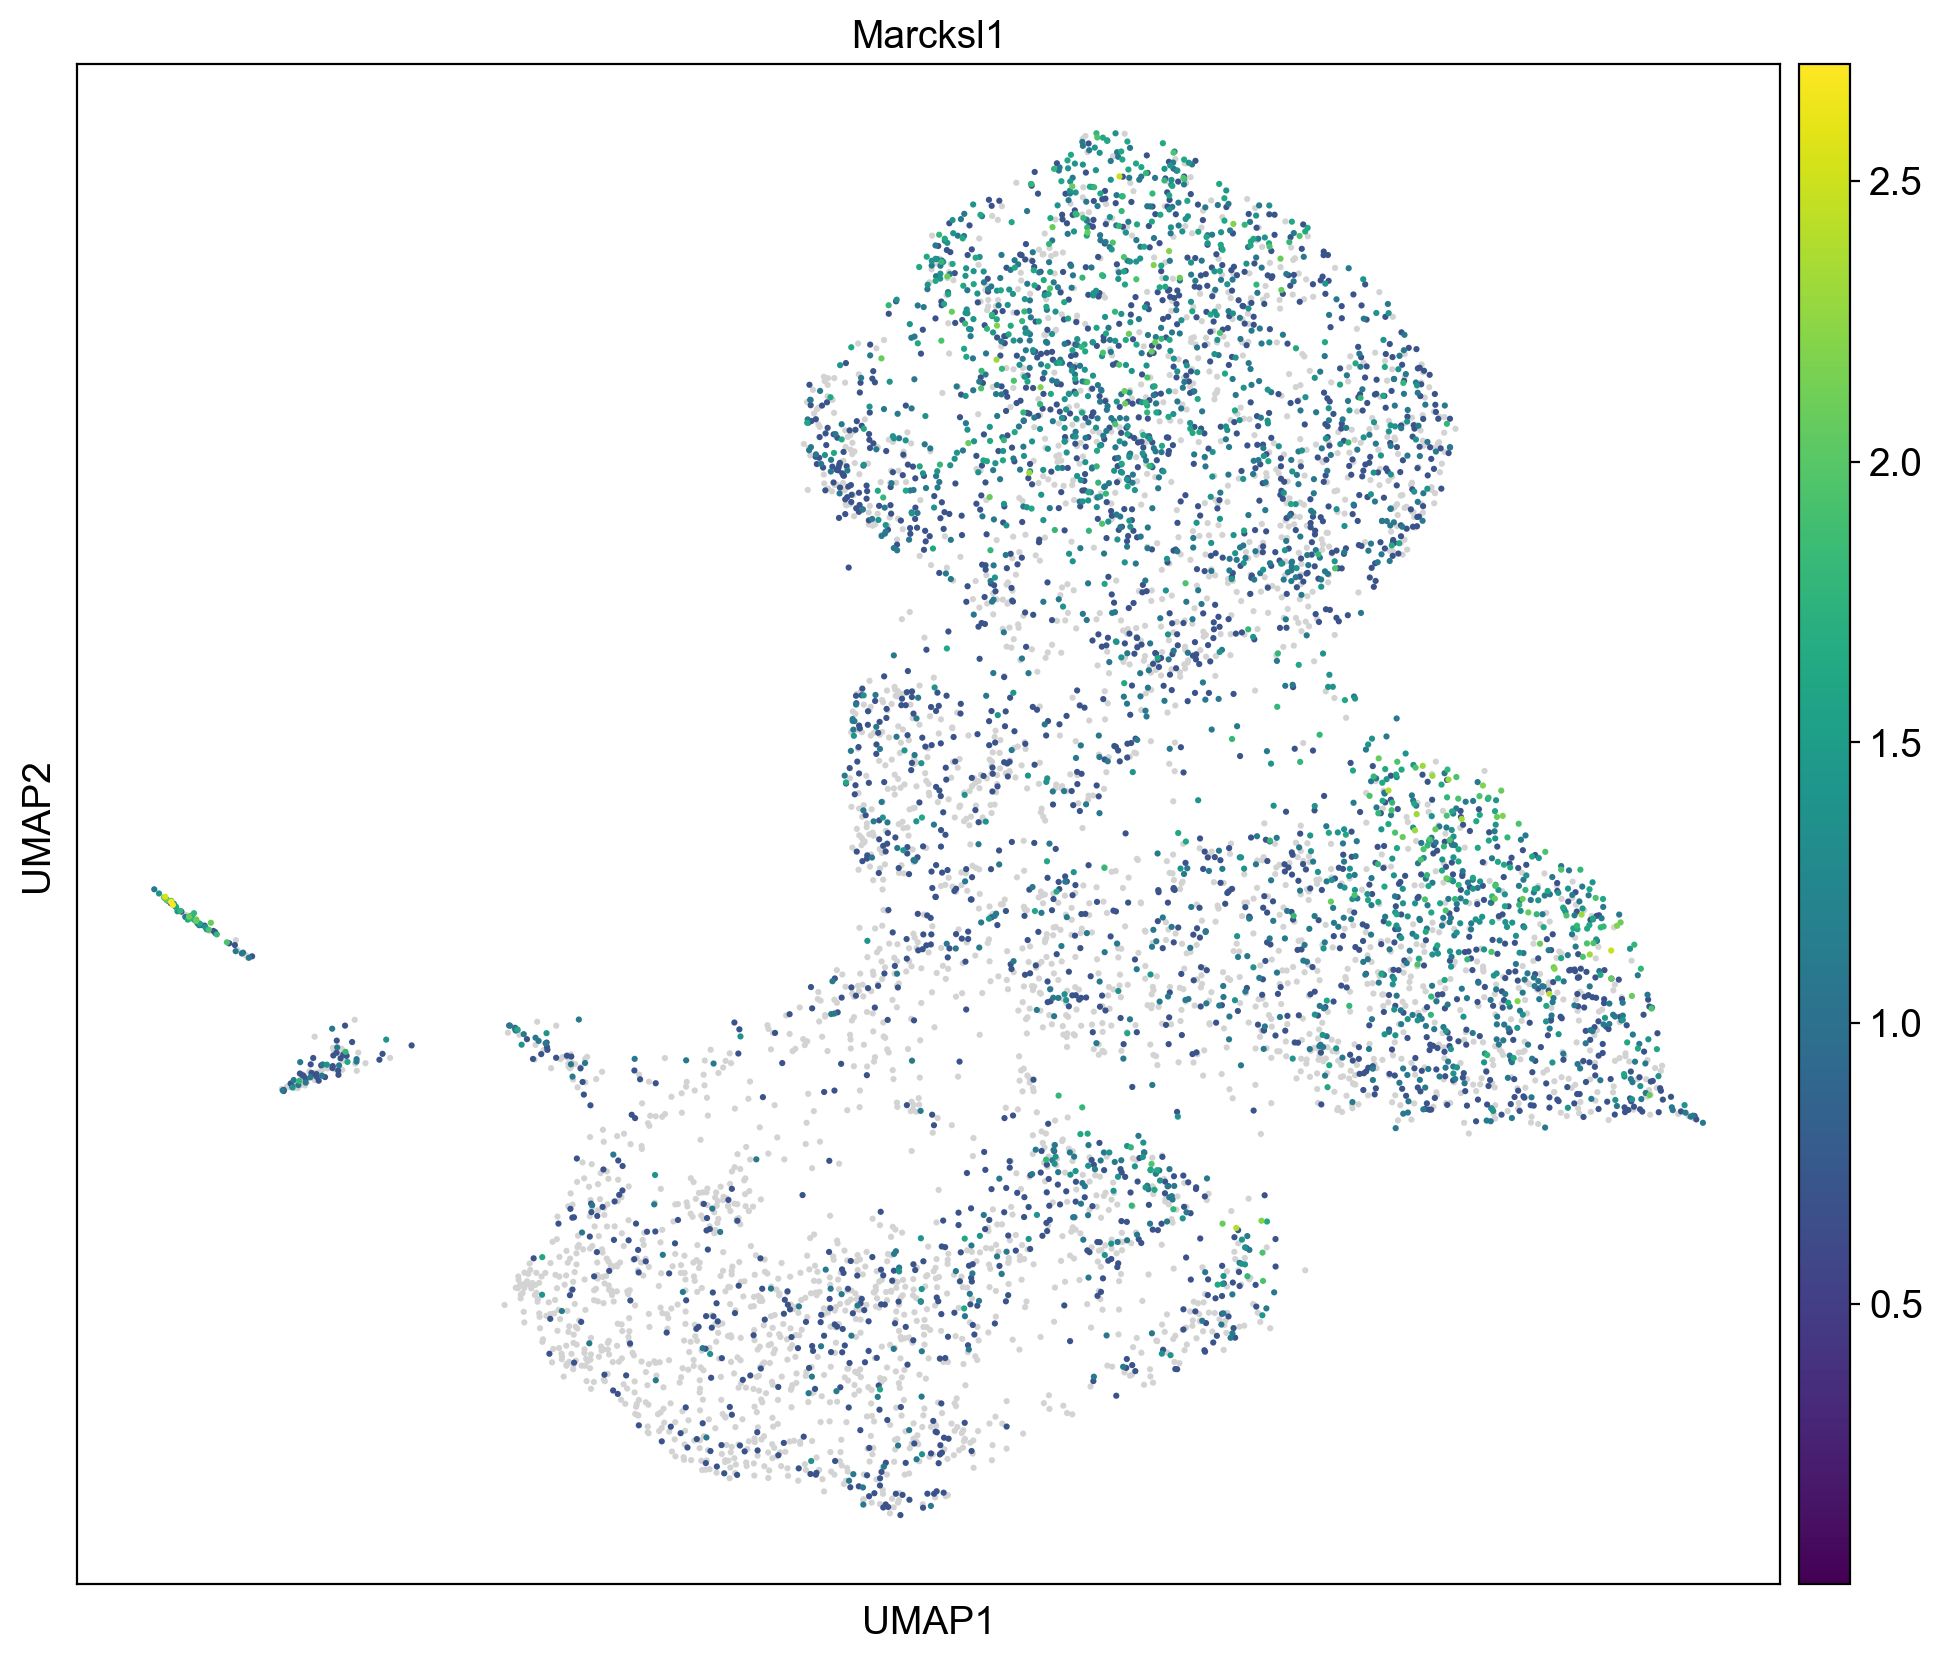

In [11]:
sc.pl.umap(adata, color= 'Marcksl1',
           size = 20,layer = 'plot',color_map = vir,vmin = 0.000001)

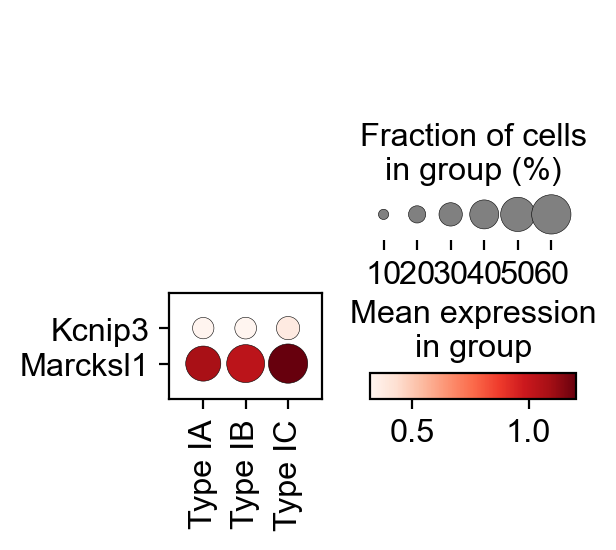

In [37]:
sc.pl.dotplot(adata[adata.obs['NeuronType'] == 'TypeI',:],var_names = ['Kcnip3','Marcksl1'],
              groupby = 'NeuronSubtype',#standard_scale = 'var',
              swap_axes = True)

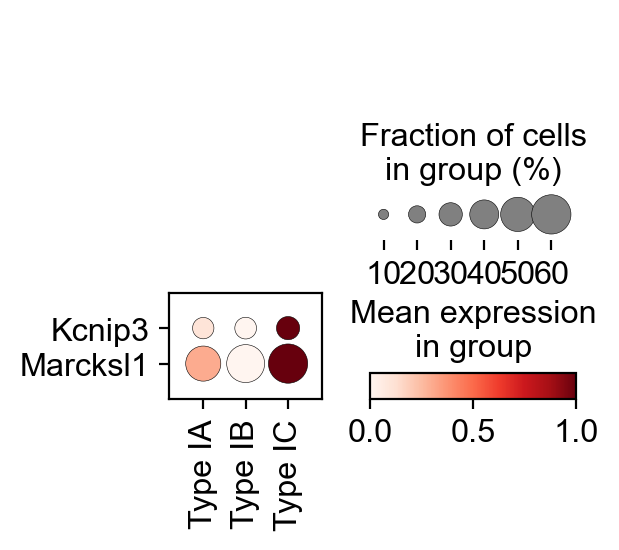

In [42]:
sc.pl.dotplot(adata[adata.obs['NeuronType'] == 'TypeI',:],var_names = ['Kcnip3','Marcksl1'],
              groupby = 'NeuronSubtype',standard_scale = 'var',
              swap_axes = True)

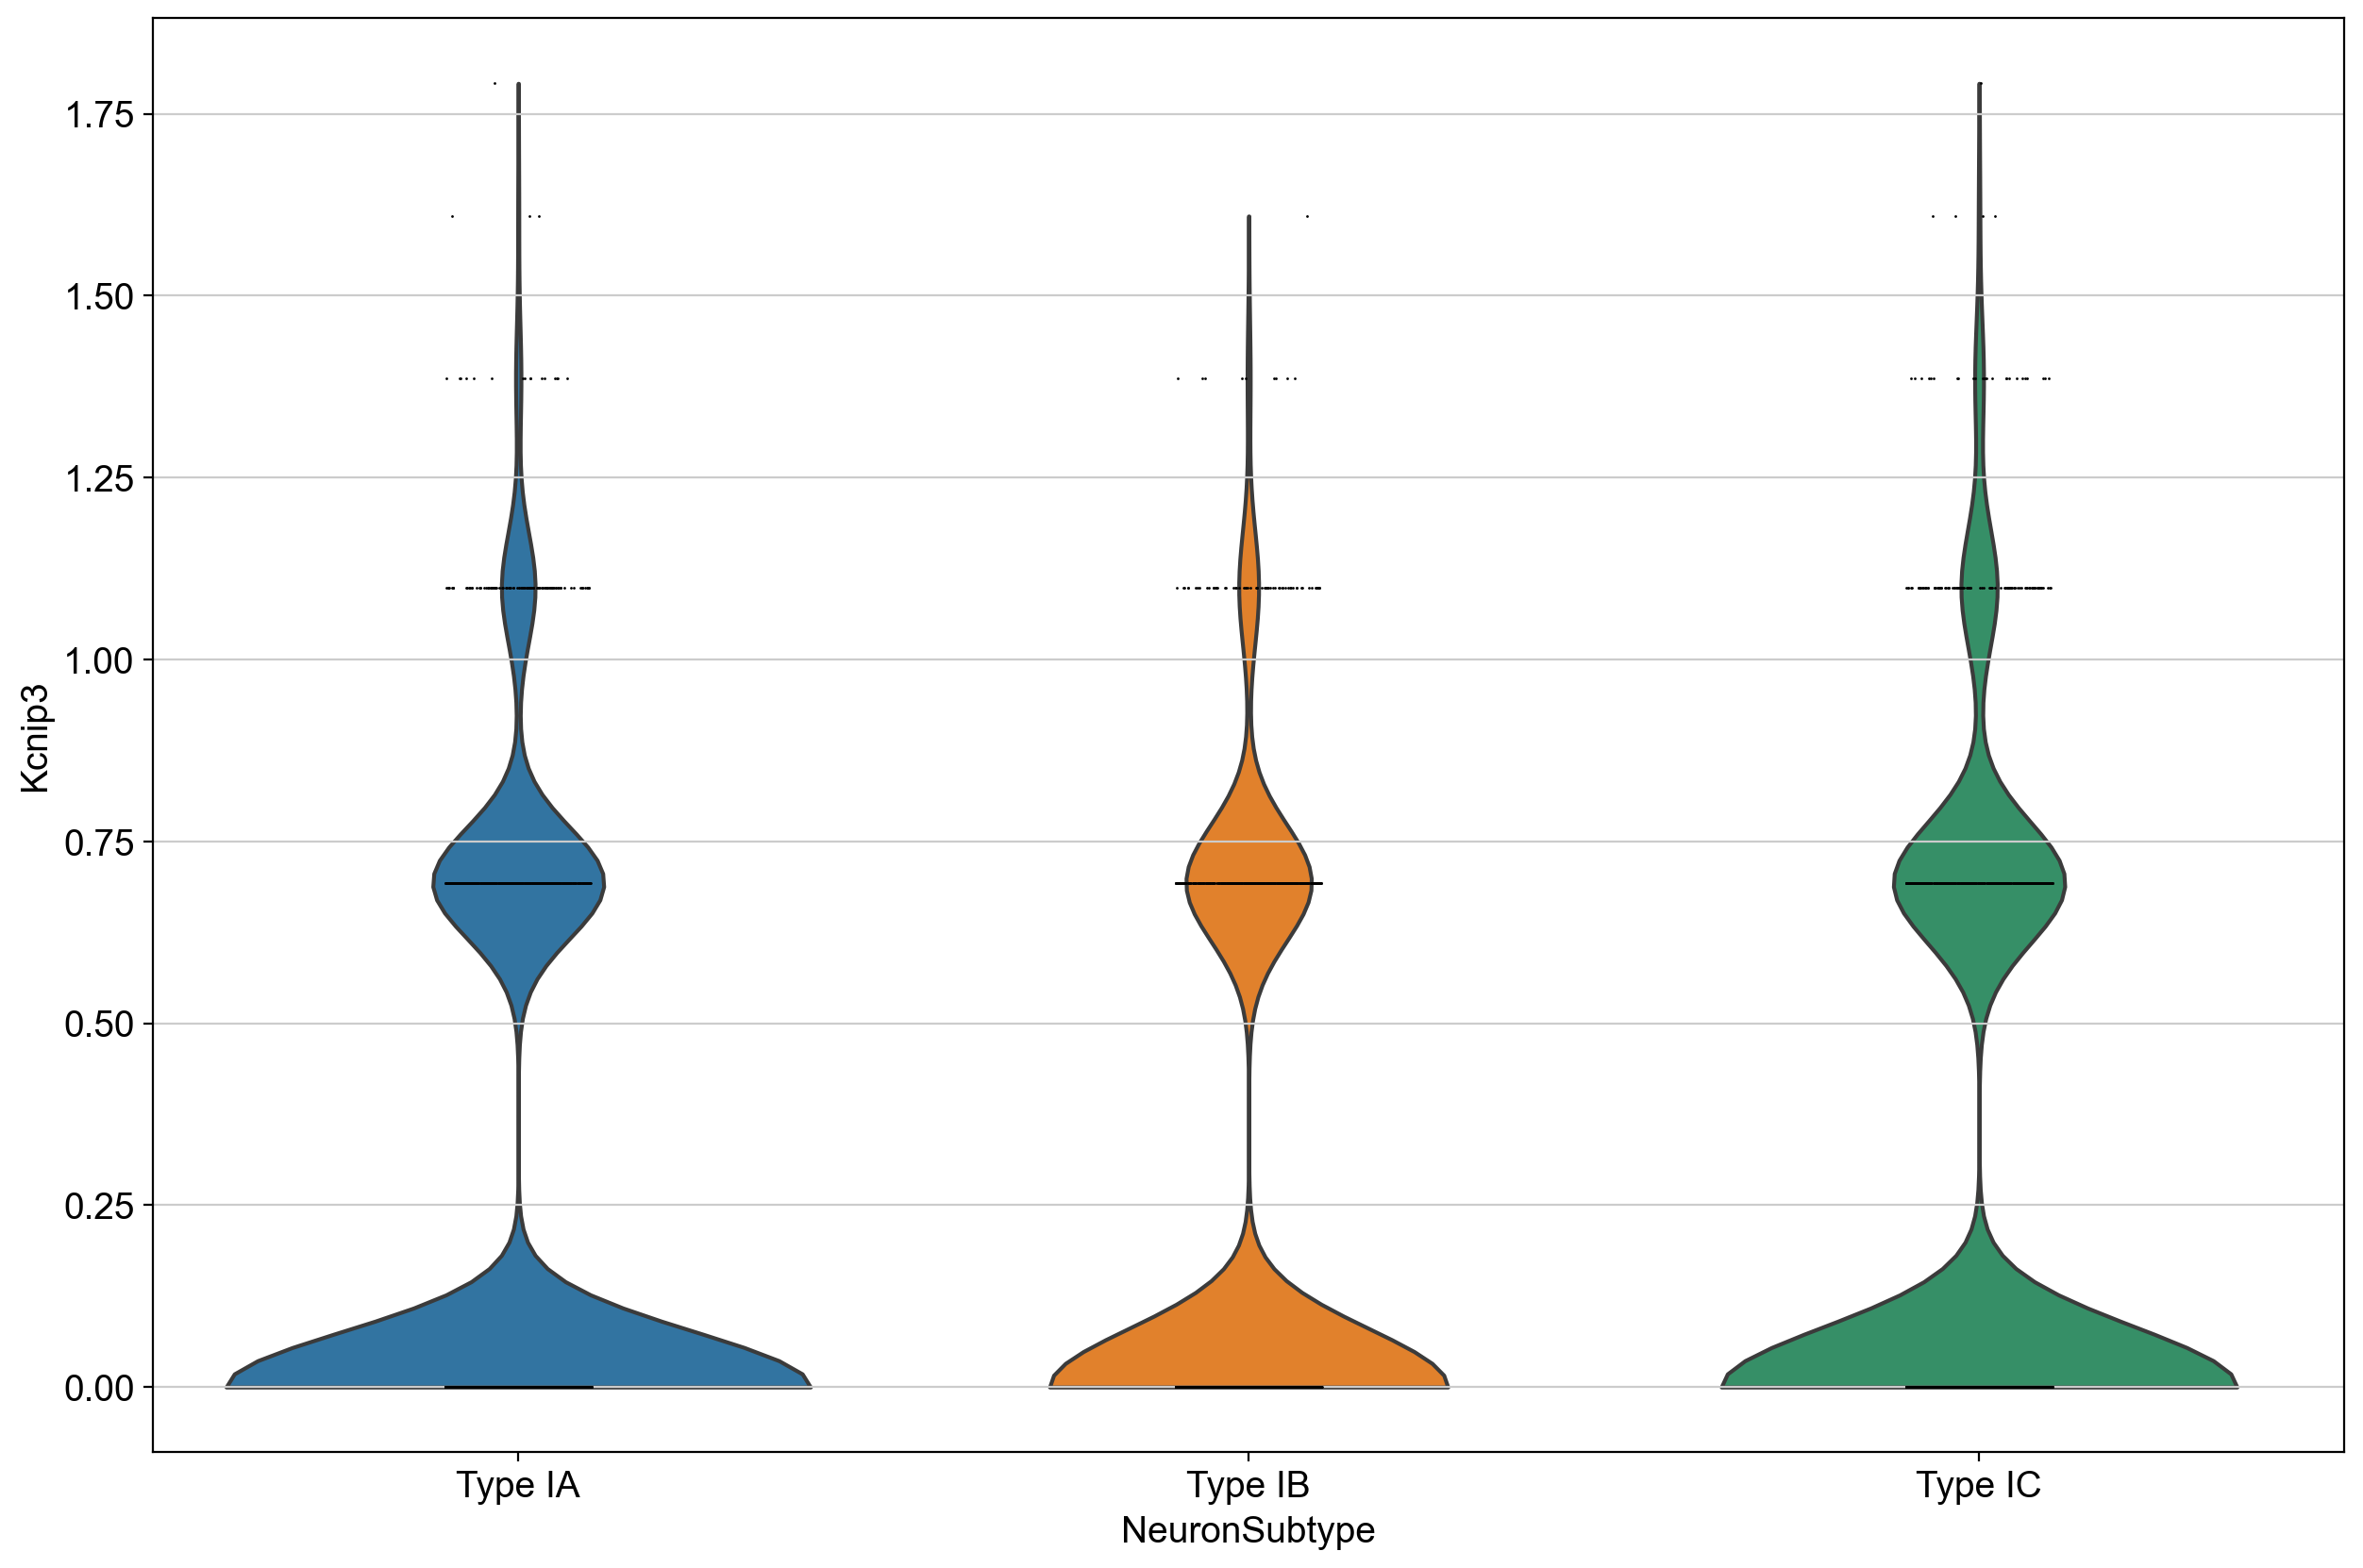

In [35]:
sc.pl.violin(adata[adata.obs['NeuronType'] == 'TypeI',:],keys = 'Kcnip3',layer = 'plot',use_raw = False,
             groupby = 'NeuronSubtype',scale = 'count')

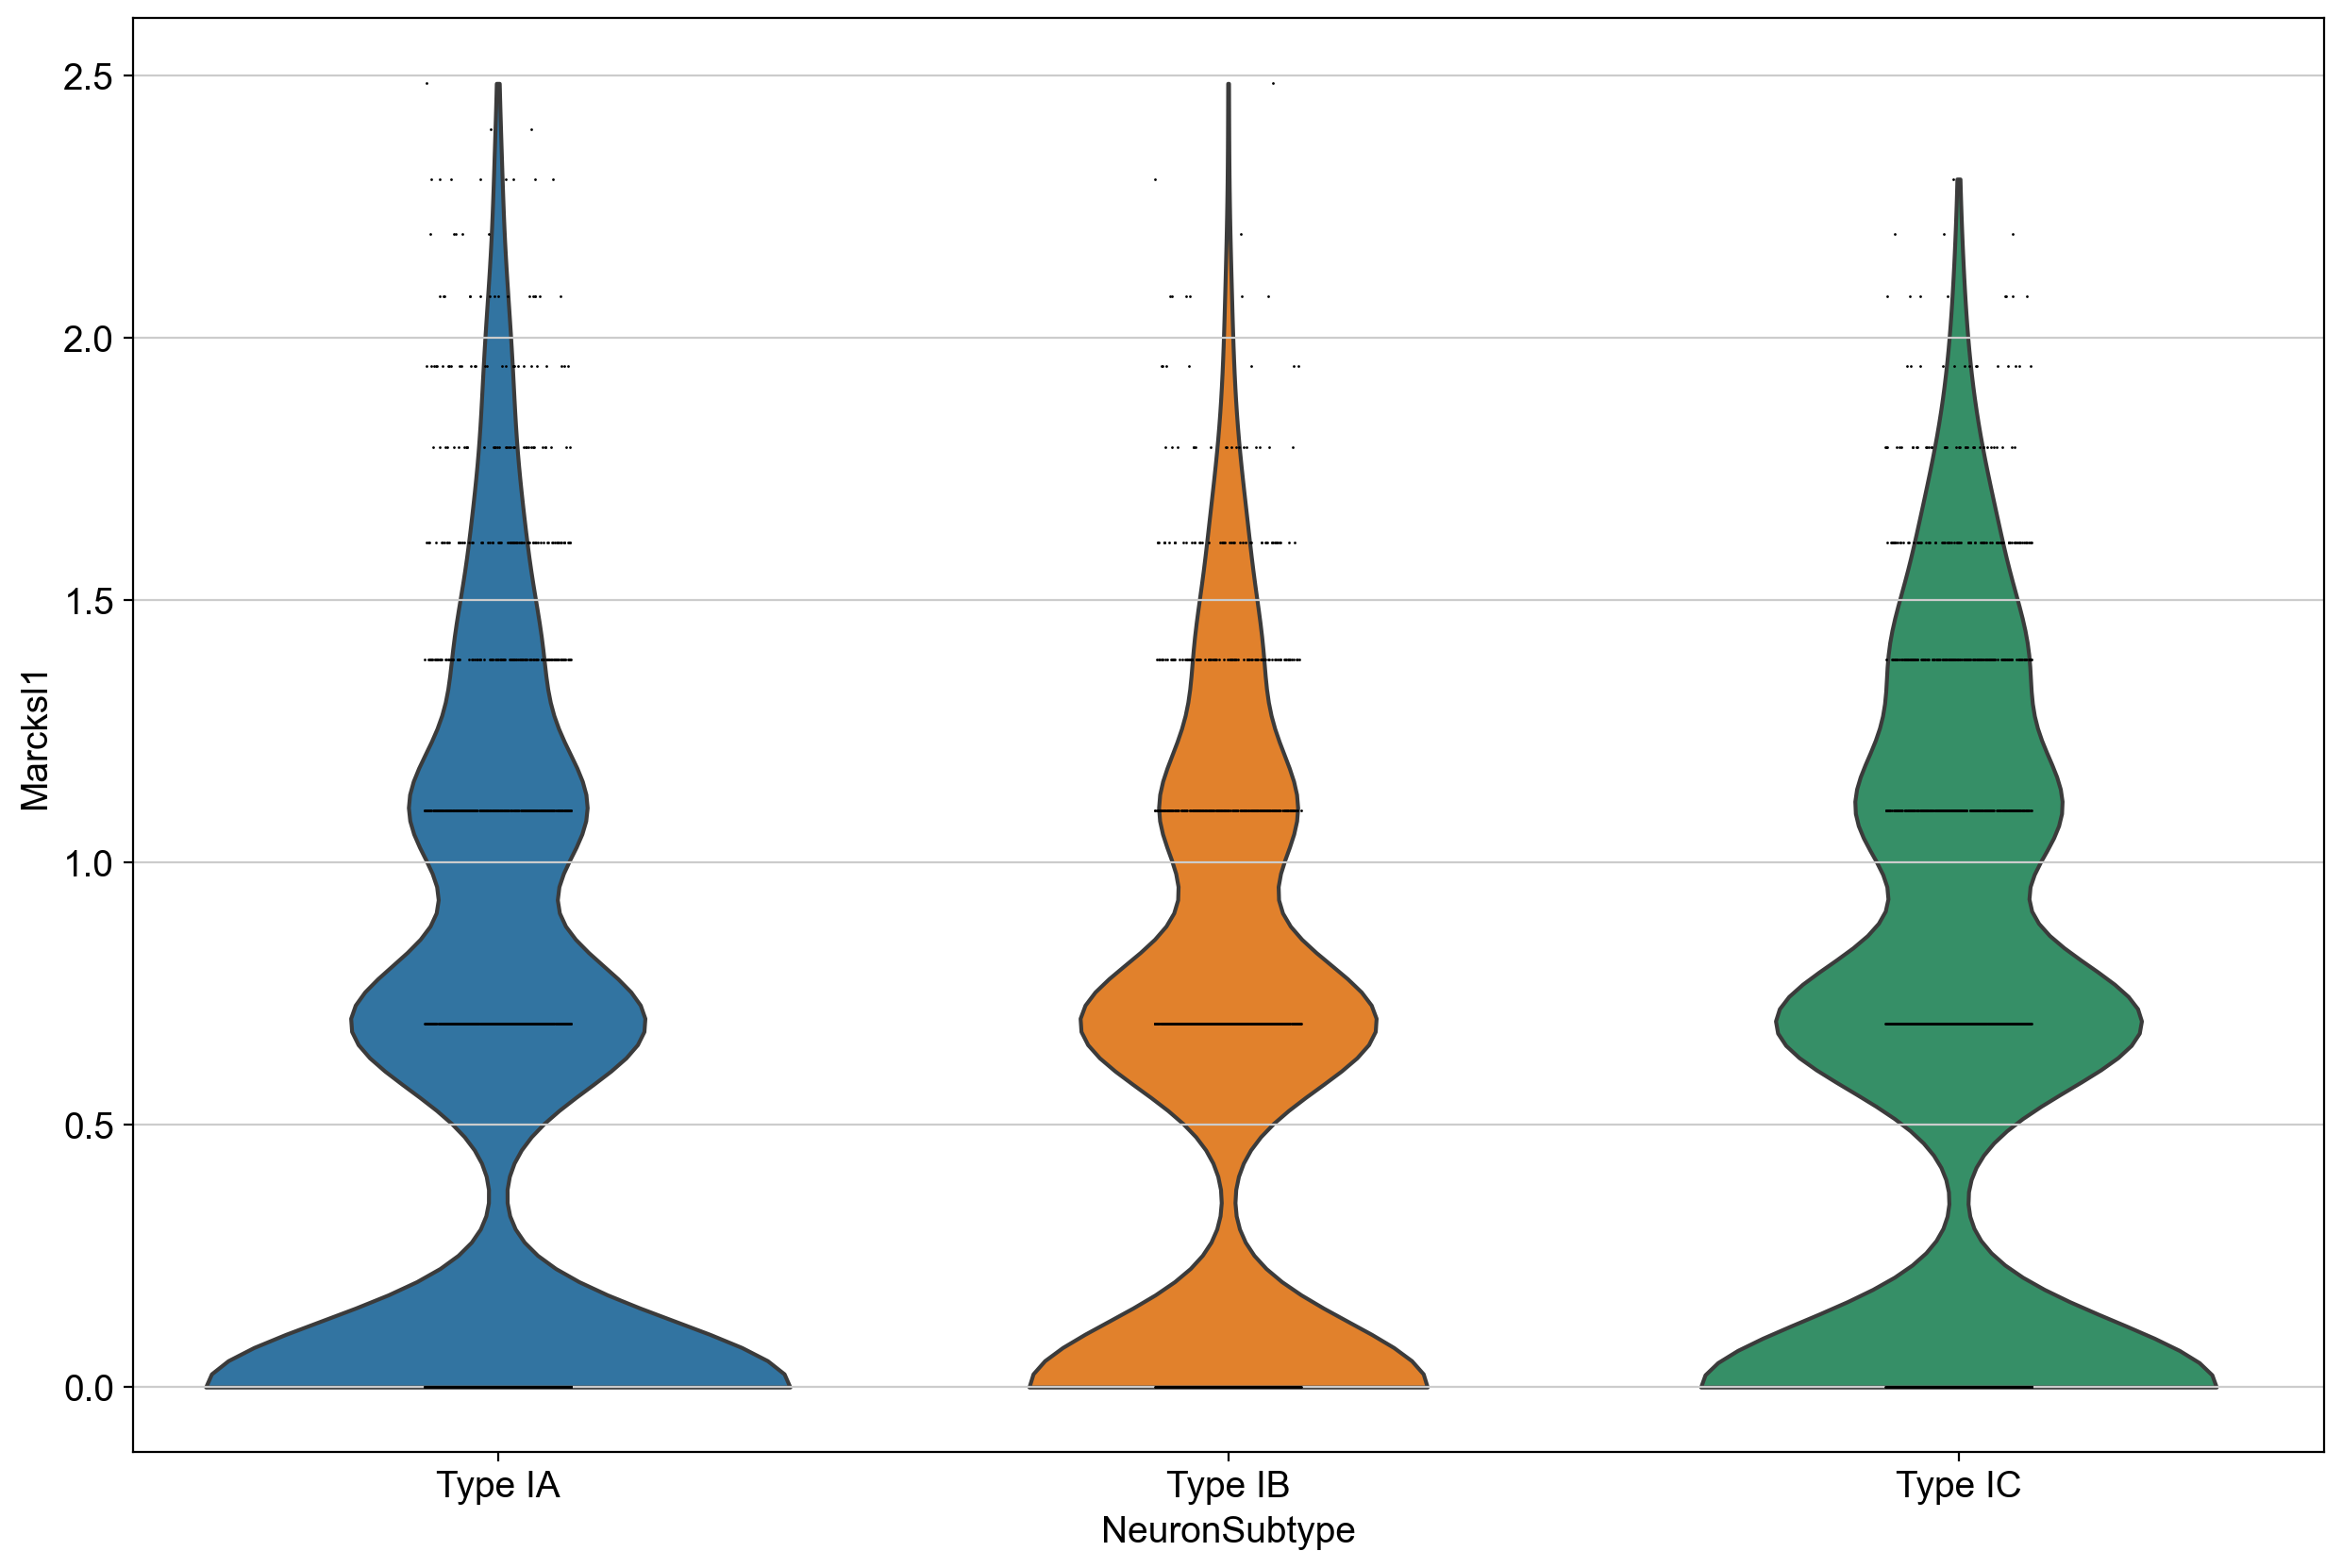

In [34]:
sc.pl.violin(adata[adata.obs['NeuronType'] == 'TypeI',:],keys = 'Marcksl1',layer = 'plot',use_raw = False,
             groupby = 'NeuronSubtype',scale = 'count')

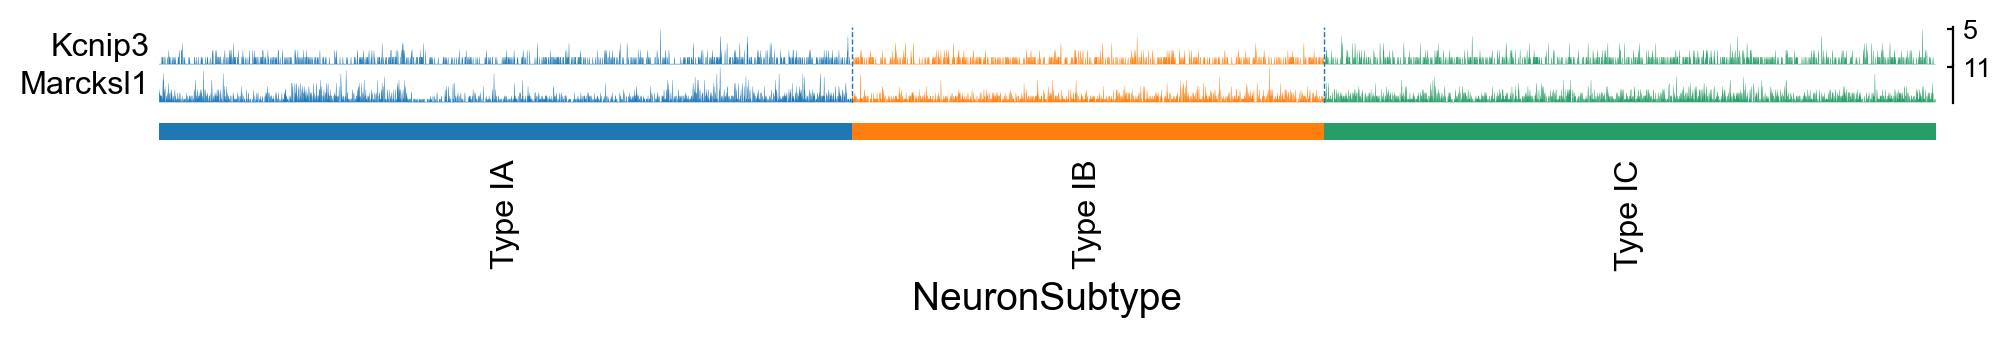

In [36]:
sc.pl.tracksplot(adata[adata.obs['NeuronType'] == 'TypeI',:],var_names = ['Kcnip3','Marcksl1'],
              groupby = 'NeuronSubtype')